In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable
import scipy.stats as stats
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score
import warnings  

# Ignore all warnings  
warnings.filterwarnings('ignore')

sns.set(style="whitegrid")
%matplotlib inline

In [3]:
# Load the dataset 
#df = pd.read_csv('../../../raw/student_depression_dataset.csv')
import os

# Get the project root based on the notebook's location
project_root = os.path.abspath(os.path.join(os.getcwd(), '../../'))  # go up to project root

# Create a path to your dataset
csv_path = os.path.join(project_root, 'Data', 'raw', 'student_depression_dataset.csv')

# Load it
import pandas as pd
df = pd.read_csv(csv_path)


In [4]:
df.head()# print first 5 rows of the dataset
    

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [5]:
df.shape

(27901, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

For better usage here change the object types into categorical  variables

In [7]:
df['Gender'] = df['Gender'].astype('category')
df['Profession'] = df['Profession'].astype('category')
df['Dietary Habits'] = df['Dietary Habits'].astype('category')
df['Degree'] = df['Degree'].astype('category')
df['Sleep Duration'] = df['Sleep Duration'].astype('category')
df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   id                                     27901 non-null  int64   
 1   Gender                                 27901 non-null  category
 2   Age                                    27901 non-null  float64 
 3   City                                   27901 non-null  object  
 4   Profession                             27901 non-null  category
 5   Academic Pressure                      27901 non-null  float64 
 6   Work Pressure                          27901 non-null  float64 
 7   CGPA                                   27901 non-null  float64 
 8   Study Satisfaction                     27901 non-null  float64 
 9   Job Satisfaction                       27901 non-null  float64 
 10  Sleep Duration                         27901 non-null  cat

In [9]:
# To see statistics for all columns, including object (categorical) columns, use:
df.describe(include='all')



,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
count,27901.000000,27901,27901.000000,27901,27901,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901,27901,27901,27901,27901.000000,27901,27901,27901.000000
unique,NaN,2,NaN,52,14,NaN,NaN,NaN,NaN,NaN,5,4,28,2,NaN,6,2,NaN
top,NaN,Male,NaN,Kalyan,Student,NaN,NaN,NaN,NaN,NaN,'Less than 5 hours',Unhealthy,'Class 12',Yes,NaN,5.0,No,NaN
freq,NaN,15547,NaN,1570,27870,NaN,NaN,NaN,NaN,NaN,8310,10317,6080,17656,NaN,6715,14398,NaN
mean,70442.149421,NaN,25.822300,NaN,NaN,3.141214,0.000430,7.656104,2.943837,0.000681,NaN,NaN,NaN,NaN,7.156984,NaN,NaN,0.585499
std,40641.175216,NaN,4.905687,NaN,NaN,1.381465,0.043992,1.470707,1.361148,0.044394,NaN,NaN,NaN,NaN,3.707642,NaN,NaN,0.492645
min,2.000000,NaN,18.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000
25%,35039.000000,NaN,21.000000,NaN,NaN,2.000000,0.000000,6.290000,2.000000,0.000000,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,0.000000
50%,70684.000000,NaN,25.000000,NaN,NaN,3.000000,0.000000,7.770000,3.000000,0.000000,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,1.000000
75%,105818.000000,NaN,30.000000,NaN,NaN,4.000000,0.000000,8.920000,4.000000,0.000000,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,1.000000




### Data Completeness and Distribution
* **Complete Data**: All columns show a `count` of 27901, indicating that there are no missing values in this dataset after the preprocessing steps. This is excellent for direct use in modeling.
* **ID Column**: The `id` column is a unique identifier and should not be used as a feature in model training.

### Demographic Insights
* **Gender Distribution**: There are more `Male` participants (15547) than `Female` (since total is 27901, `Female` would be 27901-15547 = 12354). This gender distribution should be noted when interpreting results.
* **Age Range**: Participants range from 18 to 59 years old, with an average age of approximately 25.8 years. The standard deviation of 4.9 suggests that most participants are young adults.
* **Geographical Concentration**: `Kalyan` is the most frequent `City`, indicating a geographical concentration in the dataset. This might influence the generalizability of findings to other regions.
* **Primary Profession**: A significant portion of the participants are `Student` (7870), which is consistent with other academic-related features like `CGPA` and `Academic Pressure`.

### Mental Health and Related Factors
* **High Depression Prevalence**: The `Depression` column has a `mean` of approximately 0.58. Assuming '1' represents depression and '0' represents no depression, this suggests that about 58% of the individuals in this dataset are classified as having depression. This indicates a high prevalence within this sample and suggests `Depression` is your target variable.
* **Suicidal Thoughts**: A substantial number of participants (8017) have reported `Yes` to `Have you ever had suicidal thoughts ?`. This highlights a critical mental health concern within the surveyed population.
* **Academic and Work Pressure**:
    * `Academic Pressure` has a `mean` of 3.14 (on a 0-5 scale), indicating that participants generally experience moderate to high academic pressure.
    * `Work Pressure` and `Job Satisfaction` have very low `mean` values (close to 0), suggesting that many participants may not be employed or experience very little work-related stress, which aligns with a large student population. However, some individuals do report high work pressure (max 5) and job satisfaction (max 4). This suggests these columns might be sparse for non-working individuals and could be better explored in conjunction with the `Profession` column.
* **Financial Stress**: The `top` value for `Financial Stress` is '5.0', which is the highest level (assuming a scale where 5 is maximum stress), with a high frequency of 7151. This suggests that financial stress is a significant concern for many participants.
* **Lifestyle Factors**:
    * **Sleep Duration**: The most frequent `Sleep Duration` is `'Less than 5 hours'` (8310 participants), which is a concerning finding and a known risk factor for mental health issues.
    * **Dietary Habits**: `Unhealthy` is the most common `Dietary Habits` (10317 participants), another factor that can impact overall well-being and mental health.
* **Family History**: The `Family History of Mental Illness` column shows a relatively balanced distribution, with 'No' being slightly more frequent. This suggests it's a relevant feature to consider in understanding mental health predispositions.
* **CGPA and Study Satisfaction**: While `CGPA` has a high average (7.65 out of 10), `Study Satisfaction` has a moderate average (2.94 out of 5). This suggests that high academic performance doesn't necessarily correlate with high satisfaction from studying, which could be a source of stress.

### Decisions for Further Analysis and Modeling

1.  **Target Variable**: The `Depression` column is clearly your target variable for predictive modeling. Be mindful of the potential class imbalance (58% positive class).
2.  **Feature Selection/Engineering**: All provided features appear to be relevant for predicting depression. However, `Work Pressure` and `Job Satisfaction` might need special handling if a large portion of the data are indeed students and not employed.
3.  **Categorical Encoding**: Columns like `Gender`, `City`, `Profession`, `Sleep Duration`, `Dietary Habits`, `Degree`, `Have you ever had suicidal thoughts ?`, `Financial Stress`, and `Family History of Mental Illness` are categorical and will need to be converted into numerical representations (e.g., using one-hot encoding or label encoding) before being fed into most machine learning models.
4.  **Numerical Feature Scaling**: Numerical features such as `Age`, `Academic Pressure`, `CGPA`, `Study Satisfaction`, `Work/Study Hours` will likely benefit from scaling (e.g., using `StandardScaler`) to ensure that features with larger ranges do not disproportionately influence the model.
5.  **Exploratory Data Analysis (EDA)**: Further visualize the relationships between these features and the `Depression` outcome to understand which factors have the strongest correlations or predictive power. For example, analyze the average `Sleep Duration` or `Financial Stress` for individuals with and without depression.

In [25]:
(df == 0).sum() 

id                                           0
Gender                                       0
Age                                          0
City                                         0
Profession                                   0
Academic Pressure                            9
Work Pressure                            27898
CGPA                                         9
Study Satisfaction                          10
Job Satisfaction                         27893
Sleep Duration                               0
Dietary Habits                               0
Degree                                       0
Have you ever had suicidal thoughts ?        0
Work/Study Hours                          1700
Financial Stress                             0
Family History of Mental Illness             0
Depression                               11565
dtype: int64

In [32]:
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

id: [     2      8     26 ... 140689 140690 140699]
Gender: ['Male', 'Female']
Categories (2, object): ['Female', 'Male']
Age: [33. 24. 31. 28. 25. 29. 30. 27. 19. 20. 23. 18. 21. 22. 34. 32. 26. 39.
 35. 42. 36. 58. 49. 38. 51. 44. 43. 46. 59. 54. 48. 56. 37. 41.]
City: ['Visakhapatnam' 'Bangalore' 'Srinagar' 'Varanasi' 'Jaipur' 'Pune' 'Thane'
 'Chennai' 'Nagpur' 'Nashik' 'Vadodara' 'Kalyan' 'Rajkot' 'Ahmedabad'
 'Kolkata' 'Mumbai' 'Lucknow' 'Indore' 'Surat' 'Ludhiana' 'Bhopal'
 'Meerut' 'Agra' 'Ghaziabad' 'Hyderabad' 'Vasai-Virar' 'Kanpur' 'Patna'
 'Faridabad' 'Delhi' 'Saanvi' 'M.Tech' 'Bhavna' "'Less Delhi'" 'City'
 '3.0' "'Less than 5 Kalyan'" 'Mira' 'Harsha' 'Vaanya' 'Gaurav' 'Harsh'
 'Reyansh' 'Kibara' 'Rashi' 'ME' 'M.Com' 'Nalyan' 'Mihir' 'Nalini'
 'Nandini' 'Khaziabad']
Profession: ['Student', ''Civil Engineer'', 'Architect', ''UX/UI Designer'', ''Digital Marketer'', ..., 'Chef', 'Doctor', 'Lawyer', 'Entrepreneur', 'Pharmacist']
Length: 14
Categories (14, object): [''Civil Engi

In [33]:
df['Sleep Duration'] = df['Sleep Duration'].replace('Others', np.nan)
df['Financial Stress'] = df['Financial Stress'].replace('?', np.nan)
df['Dietary Habits'] = df['Dietary Habits'].replace('Others', np.nan)

In [34]:
df.isnull().sum()

id                                        0
Gender                                    0
Age                                       0
City                                      0
Profession                                0
Academic Pressure                         0
Work Pressure                             0
CGPA                                      0
Study Satisfaction                        0
Job Satisfaction                          0
Sleep Duration                           18
Dietary Habits                           12
Degree                                    0
Have you ever had suicidal thoughts ?     0
Work/Study Hours                          0
Financial Stress                          3
Family History of Mental Illness          0
Depression                                0
dtype: int64

From the value counts you've provided for 'Work Pressure', 'Job Satisfaction', 'Gender', and what appears to be 'Depression' (based on the 0/1 values and percentages), here are the key decisions and insights:

### 1. `Work Pressure`

* **Decision/Insight**: This column is extremely imbalanced. Almost **99.99%** of the participants report a 'Work Pressure' of 0.0. Only a tiny fraction (0.01% for 5.0, 0.00% for 2.0) report any work pressure.
    * **Implication for Modeling**: This feature will likely have very low variance and might not be highly predictive in its current numerical form.
    * **Possible Action**: Consider if this feature should be used at all. If used, it might be more effective to convert it into a binary feature (e.g., 0 for no pressure, 1 for any pressure $>0$) or combine it with other employment-related features if they exist. Its high concentration at 0.0 reinforces the previous observation that many participants might be students or not actively working.

### 2. `Job Satisfaction`

* **Decision/Insight**: Similar to 'Work Pressure', this column is also highly imbalanced. **99.97%** of participants report 'Job Satisfaction' as 0.0. Other satisfaction levels (1.0, 2.0, 3.0, 4.0) are extremely rare.
    * **Implication for Modeling**: This feature also has very low variance and may not be very informative as a direct numerical feature.
    * **Possible Action**: Similar to 'Work Pressure', you might consider binarizing it or re-evaluating its utility in the model. This extreme skew could indicate that a vast majority of the dataset's participants are not employed or are highly dissatisfied, aligning with the large student demographic.

### 3. `Gender`

* **Decision/Insight**: The table is truncated, but from the previous `df.describe(include='all')` output, we know 'Male' is the `top` category. This column provides important demographic information.
    * **Implication for Modeling**: 'Gender' is a categorical feature and will need to be encoded (e.g., using one-hot encoding or label encoding) for most machine learning models.

### 4. Last Table (Likely `Depression` or a similar binary target)

* **Decision/Insight**: This table clearly shows a class imbalance for what appears to be a binary target variable (likely `Depression`).
    * **Class 1**: 16336 counts (58.55%) - This is the majority class.
    * **Class 0**: 11565 counts (41.45%) - This is the minority class.
    * **Implication for Modeling**: When training classification models, this imbalance is crucial to consider.
    * **Possible Actions**:
        * **Stratified Splitting**: Ensure that your data is split into training and testing sets in a stratified manner (e.g., using `stratify` parameter in `train_test_split`) to maintain this class distribution in both sets.
        * **Evaluation Metrics**: Do not rely solely on accuracy. Use metrics that are more robust to class imbalance, such as **Precision, Recall, F1-score, and ROC-AUC**.
        * **Addressing Imbalance (Optional, depending on model performance)**: If initial model performance is poor, consider techniques like:
            * **Resampling**: Oversampling the minority class (e.g., using SMOTE) or undersampling the majority class.
            * **Algorithm Choice**: Some algorithms (e.g., tree-based models like Random Forest, XGBoost) are less sensitive to class imbalance.
            * **Cost-sensitive learning**: Assign different misclassification costs to different classes.

In summary, the value counts highlight data sparsity and imbalance issues in certain features (`Work Pressure`, `Job Satisfaction`) and confirm a class imbalance in the target variable (`Depression`), all of which will require careful consideration during feature engineering, model selection, and evaluation.

In [35]:


def value_counts_pretty(series, column_name="Value"):
    value_counts = series.value_counts(dropna=False)
    percentages = series.value_counts(normalize=True, dropna=False) * 100

    table = PrettyTable()
    table.field_names = [column_name, "Count", "Percentage"]
    table.align[column_name] = "c"
    table.align["Count"] = "r"
    table.align["Percentage"] = "r"

    for value, count in value_counts.items():
        display_value = "NaN/Missing" if pd.isna(value) else str(value)
        pct = percentages[value]
        table.add_row([display_value, count, f"{pct:.2f}%"])
    return table

colsJob = ['Work Pressure', 'Job Satisfaction','Gender' ,'Age' ,'City' ,'Profession' ,'Academic Pressure' ,'Work Pressure' ,
           'CGPA' ,'Job Satisfaction' ,'Sleep Duration' ,'Dietary Habits' ,'Study Satisfaction' ,'Have you ever had suicidal thoughts ?', 
           'Work/Study Hours','Financial Stress','Family History of Mental Illness','Depression'   ]                            

for col in colsJob:
    print(f"\n Value counts for '{col}':")
    print(value_counts_pretty(df[col], col))


 Value counts for 'Work Pressure':
+---------------+-------+------------+
| Work Pressure | Count | Percentage |
+---------------+-------+------------+
|      0.0      | 27898 |     99.99% |
|      5.0      |     2 |      0.01% |
|      2.0      |     1 |      0.00% |
+---------------+-------+------------+

 Value counts for 'Job Satisfaction':
+------------------+-------+------------+
| Job Satisfaction | Count | Percentage |
+------------------+-------+------------+
|       0.0        | 27893 |     99.97% |
|       2.0        |     3 |      0.01% |
|       4.0        |     2 |      0.01% |
|       1.0        |     2 |      0.01% |
|       3.0        |     1 |      0.00% |
+------------------+-------+------------+

 Value counts for 'Gender':
+--------+-------+------------+
| Gender | Count | Percentage |
+--------+-------+------------+
|  Male  | 15547 |     55.72% |
| Female | 12354 |     44.28% |
+--------+-------+------------+

 Value counts for 'Age':
+------+-------+-----------

In [38]:
def value_counts_pretty(series, column_name="Value", threshold_percentage=90):
    value_counts = series.value_counts(dropna=False)
    percentages = series.value_counts(normalize=True, dropna=False) * 100

    # Check if any percentage meets the threshold
    if not (percentages >= threshold_percentage).any():
        return None # Return None if no value meets the threshold

    table = PrettyTable()
    table.field_names = [column_name, "Count", "Percentage"]
    table.align[column_name] = "c"
    table.align["Count"] = "r"
    table.align["Percentage"] = "r"

    for value, count in value_counts.items():
        display_value = "NaN/Missing" if pd.isna(value) else str(value)
        pct = percentages[value]
        table.add_row([display_value, count, f"{pct:.2f}%"])
    return table

colsJob = ['Work Pressure', 'Job Satisfaction','Gender' ,'Age' ,'City' ,'Profession' ,'Academic Pressure' ,
           'CGPA' ,'Sleep Duration' ,'Dietary Habits' ,'Study Satisfaction' ,'Have you ever had suicidal thoughts ?',
           'Work/Study Hours','Financial Stress','Family History of Mental Illness','Depression']

for col in colsJob:
    table_output = value_counts_pretty(df[col], col)
    if table_output: # Only print if the table is not None (i.e., meets the threshold)
        print(f"\n Value counts for '{col}':")
        print(table_output)


 Value counts for 'Work Pressure':
+---------------+-------+------------+
| Work Pressure | Count | Percentage |
+---------------+-------+------------+
|      0.0      | 27898 |     99.99% |
|      5.0      |     2 |      0.01% |
|      2.0      |     1 |      0.00% |
+---------------+-------+------------+

 Value counts for 'Job Satisfaction':
+------------------+-------+------------+
| Job Satisfaction | Count | Percentage |
+------------------+-------+------------+
|       0.0        | 27893 |     99.97% |
|       2.0        |     3 |      0.01% |
|       4.0        |     2 |      0.01% |
|       1.0        |     2 |      0.01% |
|       3.0        |     1 |      0.00% |
+------------------+-------+------------+

 Value counts for 'Profession':
+--------------------------+-------+------------+
|        Profession        | Count | Percentage |
+--------------------------+-------+------------+
|         Student          | 27870 |     99.89% |
|        Architect         |     8 |     

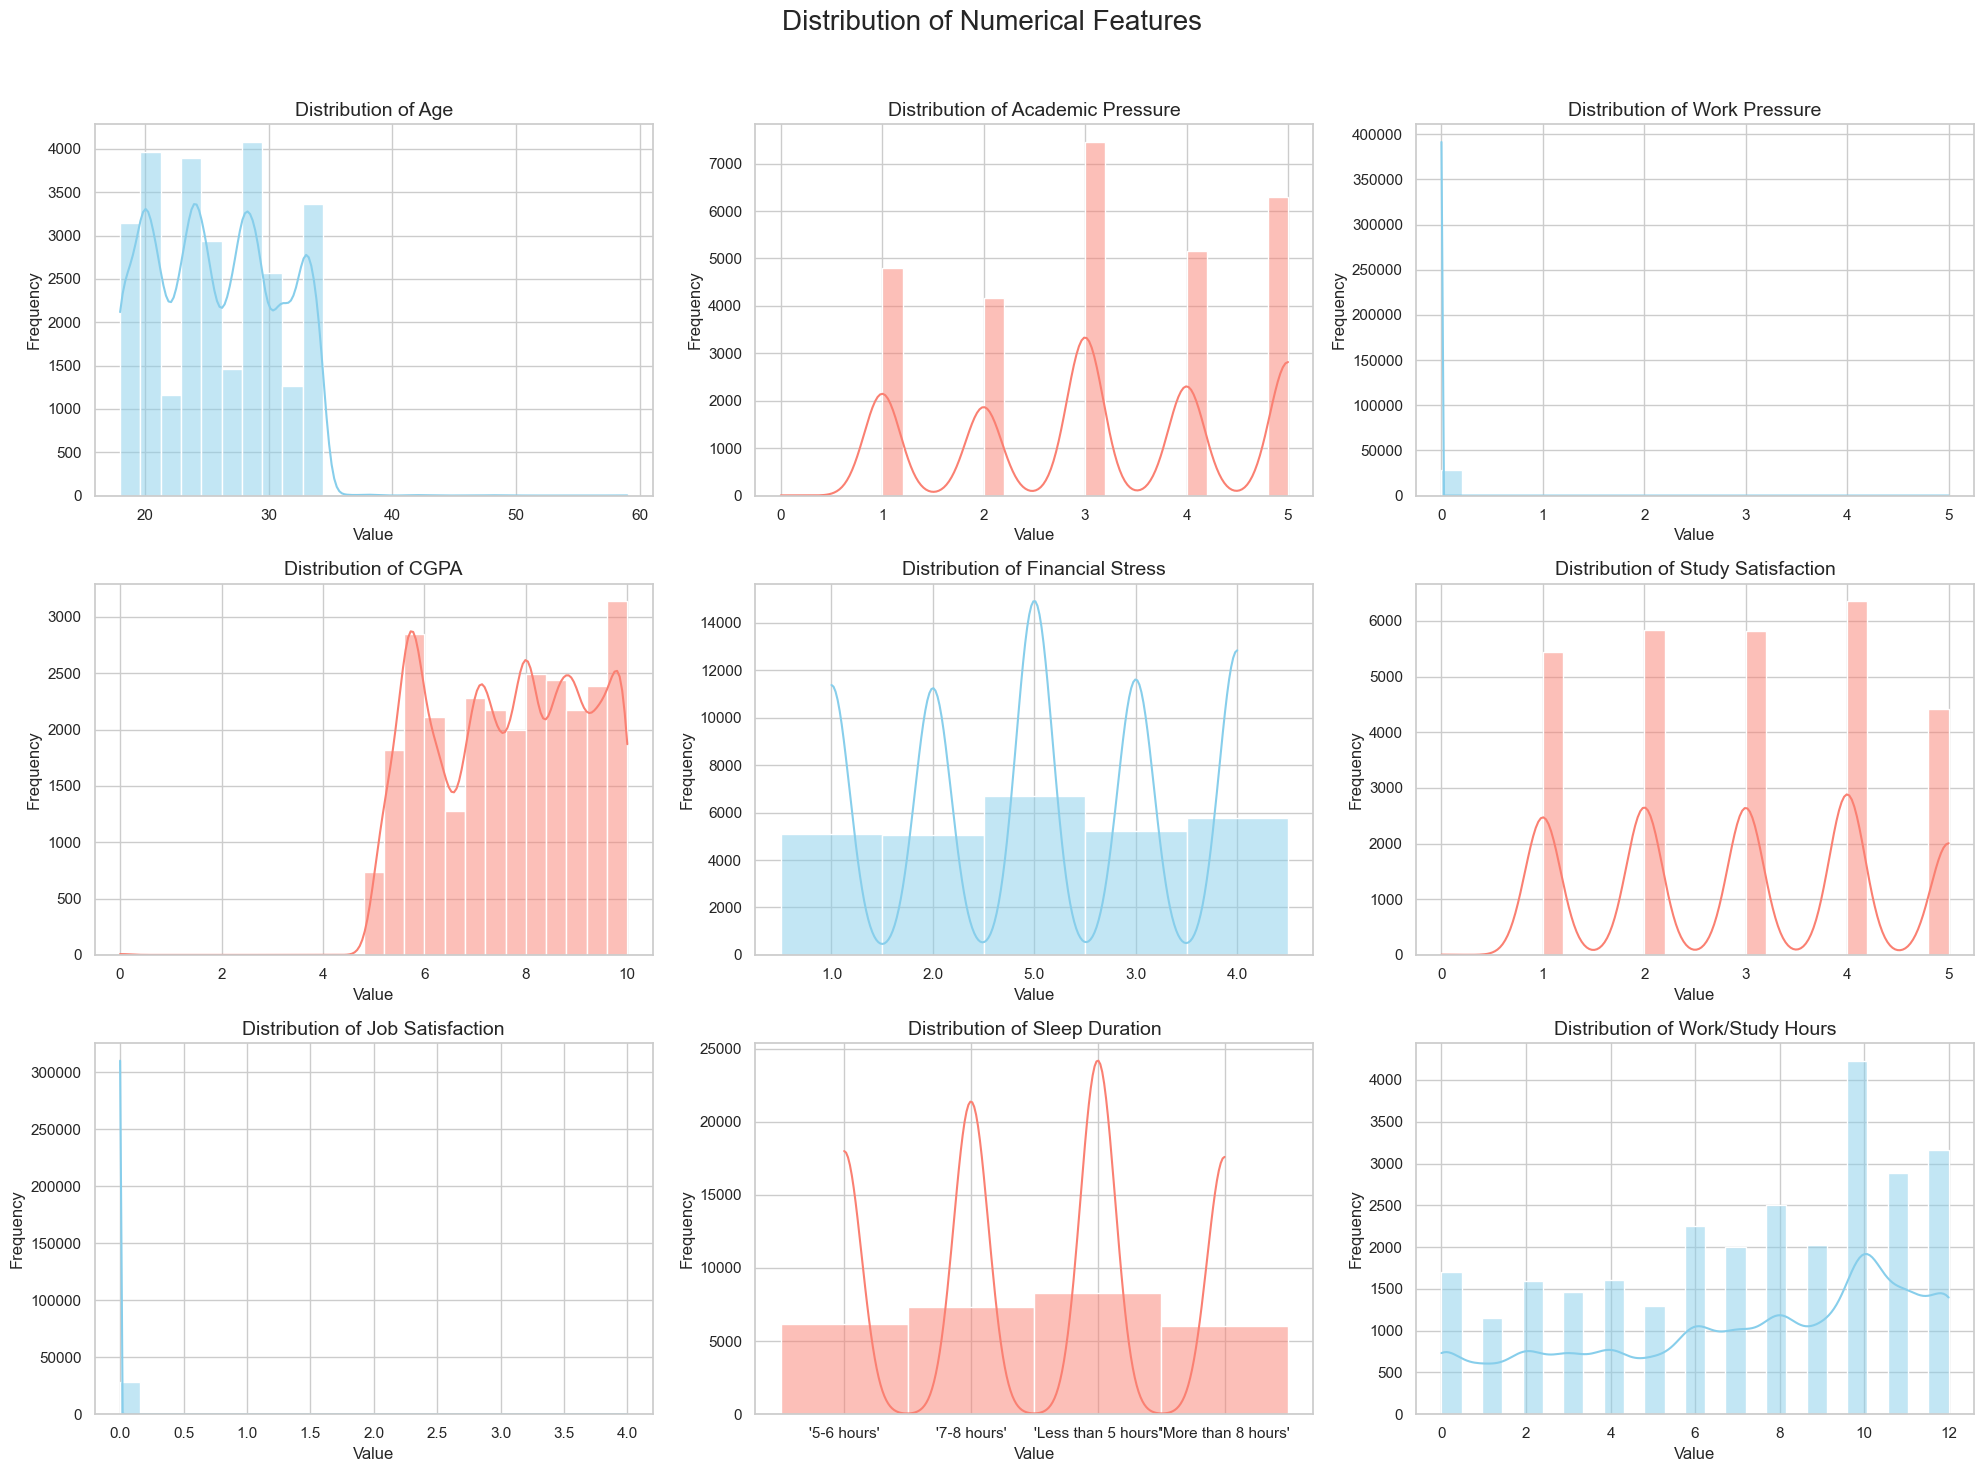

In [39]:
num_features = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Financial Stress',
                'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration', 'Work/Study Hours']

plot_data = df[num_features].dropna()

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))
axes = axes.flatten()

colors = ['skyblue', 'salmon']

for i, feature in enumerate(num_features):
    color = colors[i % len(colors)]
    sns.histplot(data=plot_data, x=feature, bins=25, kde=True, ax=axes[i], color=color)
    axes[i].set_title(f'Distribution of {feature}', fontsize=14)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)

plt.suptitle("Distribution of Numerical Features", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
